In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
%matplotlib inline
from urllib.request import urlretrieve


In [2]:
#Original data from https://advances.sciencemag.org/content/suppl/2020/05/11/6.20.eaaz1346.DC1
miller_sealevel=pd.read_csv('https://raw.githubusercontent.com/saraemp/Sea_level_curves/master/Miller_et_al_2020_sea_level.csv', sep=',')
miller_sealevel_sm=pd.read_csv('https://raw.githubusercontent.com/saraemp/Sea_level_curves/master/Miller_et_al_2020_sea_level_smooth.csv', sep=',')
sites=np.unique(miller_sealevel.site.astype('category'))

In [3]:
SL=pd.read_csv('https://raw.githubusercontent.com/saraemp/Sea_level_curves/master/Globalsealevelrecords.csv')
               

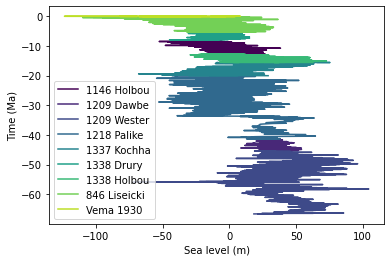

In [4]:
# Sea level curve color-coded by site
colorss=[plt.cm.viridis(i) for i in np.linspace(0, 0.9, len(sites))]#sample viridis
for i in np.arange(0,len(sites), 1):
    plt.plot(miller_sealevel.sea_level_m[miller_sealevel.site==sites[i]], miller_sealevel.age_ka[miller_sealevel.site==sites[i]]/-1e3, color=colorss[i], label=sites[i])
plt.ylabel('Time (Ma)')
plt.xlabel('Sea level (m)')
plt.legend(loc='best')

# High-frequency and smoothed sea level curves

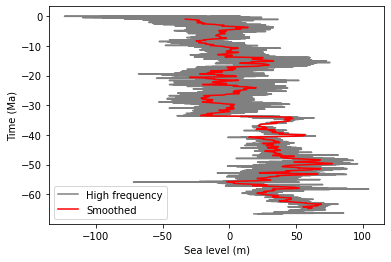

In [5]:
plt.plot(miller_sealevel.sea_level_m, miller_sealevel.age_ka/-1e3, 'grey', label='High frequency')
plt.plot(miller_sealevel_sm.sea_level_smoothed_m, miller_sealevel_sm.age_smoothed_ka/-1e3, 'r', label='Smoothed')
#plt.plot(y1,x1*-1)
plt.ylabel('Time (Ma)')
plt.xlabel('Sea level (m)')
plt.legend()

# Comparing Miller 2020 and Haq curves

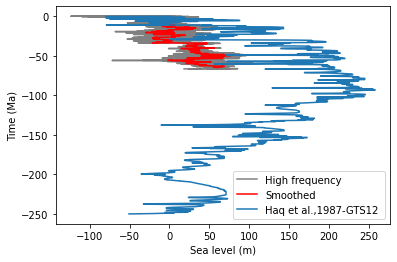

In [6]:
plt.plot(miller_sealevel.sea_level_m, miller_sealevel.age_ka/-1e3, 'grey', label='High frequency')
plt.plot(miller_sealevel_sm.sea_level_smoothed_m, miller_sealevel_sm.age_smoothed_ka/-1e3, 'r',label='Smoothed')
plt.plot(SL['Sea level\nHaq et al. (1987)\n0-244 Ma'],SL['Age (GTS12 Ma)\nHaq et al. (1987)']*-1 , label='Haq et al.,1987-GTS12 ')

plt.ylabel('Time (Ma)')
plt.xlabel('Sea level (m)')
plt.legend()